<a href="https://colab.research.google.com/github/daianeklein/dnc/blob/main/Credit_score_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT SCORE CLASSIFICATION

***

**Credit score** classification é o processo de categorizar indivíduos com base em sua capacidade de crédito.

Envolve o uso de modelos de aprendizado de máquina para prever a capacidade de crédito dos indivíduos com base em seus dados financeiros e pessoais.

Modelos como <font color='orange'>logistic regression</font> , <font color='orange'>decision trees</font> e <font color='orange'>random forests</font> são empregados para analisar o conjunto de dados e classificar os indivíduos em faixas de pontuação ou classe de crédito.

## Índice


1.   Packages Importing
2.   Data Importing
3.   Data Exploration
4.   Data Cleaning and Imputation
5.   Feature Selection
6.   Data Prepartion
7.   Machine Learning Models





## Packages Importing

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report




## Data Importing

In [2]:
df = pd.read_excel('credit_score.xlsx')

In [3]:
#rows and columns count
df.shape

(72238, 28)

## Data Exploration

In [4]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72238 entries, 0 to 72237
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        72238 non-null  object 
 1   Customer_ID               72238 non-null  object 
 2   Month                     72238 non-null  object 
 3   Name                      65039 non-null  object 
 4   Age                       72238 non-null  int64  
 5   SSN                       72238 non-null  object 
 6   Occupation                72238 non-null  object 
 7   Annual_Income             72238 non-null  float64
 8   Monthly_Inhand_Salary     61427 non-null  float64
 9   Num_Bank_Accounts         72238 non-null  int64  
 10  Num_Credit_Card           72238 non-null  int64  
 11  Interest_Rate             72238 non-null  int64  
 12  Num_of_Loan               71930 non-null  float64
 13  Type_of_Loan              64114 non-null  object 
 14  Delay_

In [5]:
#columns in the dataframe
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
# removing unecessary columns
df = df.drop(columns=(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Monthly_Inhand_Salary',
                       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age',
                       'Amount_invested_monthly','Monthly_Balance', 'Total_EMI_per_month']))

In [7]:
# basic statistical info
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio
count,72238.000000,7.223800e+04,72238.000000,72238.000000,72238.000000,71930.000000,72238.000000,72238.000000,70826.000000,72238.000000,72238.000000
mean,111.693375,1.775917e+05,16.936557,22.389490,73.821908,2.960350,21.073355,10.407966,27.595233,1429.778891,32.282920
std,695.018481,1.436103e+06,116.724130,128.548338,471.919703,63.572579,14.839444,6.788056,191.691195,1157.129069,5.112848
min,-500.000000,7.005930e+03,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-6.480000,0.000000,0.230000,20.000000
25%,24.000000,1.945549e+04,3.000000,4.000000,8.000000,1.000000,10.000000,5.352500,3.000000,568.670000,28.053046
50%,33.000000,3.775478e+04,6.000000,5.000000,13.000000,3.000000,18.000000,9.420000,6.000000,1169.200000,32.297064
75%,42.000000,7.281788e+04,7.000000,7.000000,20.000000,5.000000,28.000000,14.870000,9.000000,1953.630000,36.495859
max,8698.000000,2.419806e+07,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,36.490000,2597.000000,4998.070000,50.000000


In [8]:
#null values
df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                  308
Delay_from_due_date            0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1412
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Payment_Behaviour              0
Credit_Score                   0
dtype: int64

## Data Cleaning and Imputation

### Numerical Variables

### Age

In [9]:
df['Age'].value_counts().head()

38    2164
28    2131
31    2123
26    2110
44    2090
Name: Age, dtype: int64

In [10]:
correct_age = df[(df['Age'] > 17) & (df['Age'] < 81)]['Age']

print(correct_age.mean())
print(correct_age.median())


34.42575576378692
34.0


<Axes: xlabel='Age', ylabel='Count'>

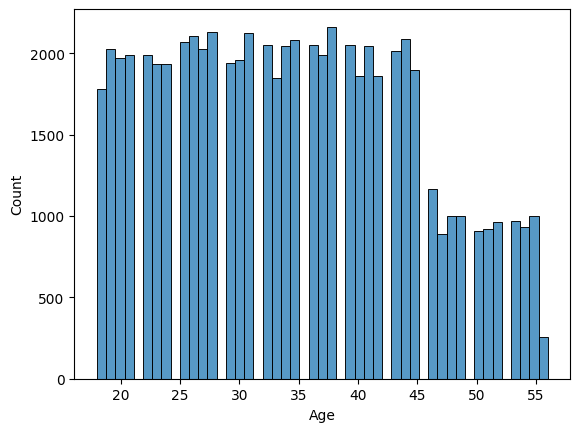

In [11]:
sns.histplot(data=correct_age)

In [12]:
df.loc[(df['Age'] < 18) | (df['Age'] > 80), 'Age'] = 34

#another approach
#df['Age'] = df['Age'].apply(lambda x: 34 if (x < 18 or x > 79) else x)

In [13]:
print(df['Age'].mean())
print(df['Age'].median())

34.389338021539906
34.0


### Other Columns

In [14]:
cols_to_clean = ['Num_Bank_Accounts', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']

for col in cols_to_clean:
  mean_value = df[col].mean()
  df.loc[(df[col] < 0), col] = mean_value #fill negative values with the mean value
  df[col] = df[col].fillna(mean_value) #fill null values with the mean value


### Nota - Média e Mediana

**📝 Média & Mediana**

Média é a soma de todos os valores dividida pelo número de valores, enquanto a mediana é o valor central em um conjunto de dados ordenados.

| Notas |
|-------|
| 8     |
| 7     |
| 8     |
| 9     |
| 7     |

**Média: 7.8**

**Mediana: 8**

***

| Notas |
|-------|
| 2     |
| 4     |
| 4     |
| 10     |
| 10     |

**Média: 6**

**Mediana: 4**

### Categorical Variables

In [15]:
#filtering out categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [16]:
#printing out the unique values in each categorical column
for col in categorical_columns:
  print(col)
  print(df[col].unique())
  print('\n')

Occupation
['Scientist' 'Teacher' '_______' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Credit_Mix
['Good' 'Standard' 'Bad']


Payment_of_Min_Amount
['No' 'NM' 'Yes']


Payment_Behaviour
['Low_spent_Large_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' 'High_spent_Small_value_payments'
 'Low_spent_Medium_value_payments']


Credit_Score
['Good' 'Standard' 'Poor']




#### Occupation

In [17]:
# how many rows the occupation == '_______'
df[df['Occupation'] == '_______'].shape

(5121, 16)

In [18]:
# replacing '_______' with Unknown
df['Occupation'] = df['Occupation'].str.replace('_______','Unknown')

#### Payment_Behaviour

In [19]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      18318
High_spent_Medium_value_payments    12725
Low_spent_Medium_value_payments     10032
High_spent_Large_value_payments      9910
High_spent_Small_value_payments      8166
Low_spent_Large_value_payments       7560
!@9#%8                               5527
Name: Payment_Behaviour, dtype: int64

In [20]:
#drop the records where Payment_Behaviour == '!@9#%8df[]'
df = df[df['Payment_Behaviour'] != '!@9#%8df[]']

In [21]:
# checking output
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [22]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio
count,72238.000000,7.223800e+04,72238.000000,72238.000000,72238.000000,72238.000000,72238.000000,72238.000000,72238.000000,72238.000000,72238.000000
mean,34.389338,1.775917e+05,16.941026,22.389490,73.821908,7.011034,21.214641,10.611477,27.595233,1429.778891,32.282920
std,9.678580,1.436103e+06,116.723786,128.548338,471.919703,59.923010,14.727388,6.587192,189.808478,1157.129069,5.112848
min,18.000000,7.005930e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000
25%,27.000000,1.945549e+04,3.000000,4.000000,8.000000,2.000000,10.000000,5.680000,3.000000,568.670000,28.053046
50%,34.000000,3.775478e+04,6.000000,5.000000,13.000000,3.000000,18.000000,9.650000,6.000000,1169.200000,32.297064
75%,41.000000,7.281788e+04,7.000000,7.000000,20.000000,5.000000,28.000000,14.870000,9.000000,1953.630000,36.495859
max,56.000000,2.419806e+07,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,36.490000,2597.000000,4998.070000,50.000000


## Feature Selection

A seleção de características é o processo de escolher as características mais relevantes e informativas de um conjunto de dados para melhorar a precisão e a eficiência dos modelos de machine learning, reduzindo a dimensionalidade e eliminando características irrelevantes ou redundantes.

### Correlation Matrix

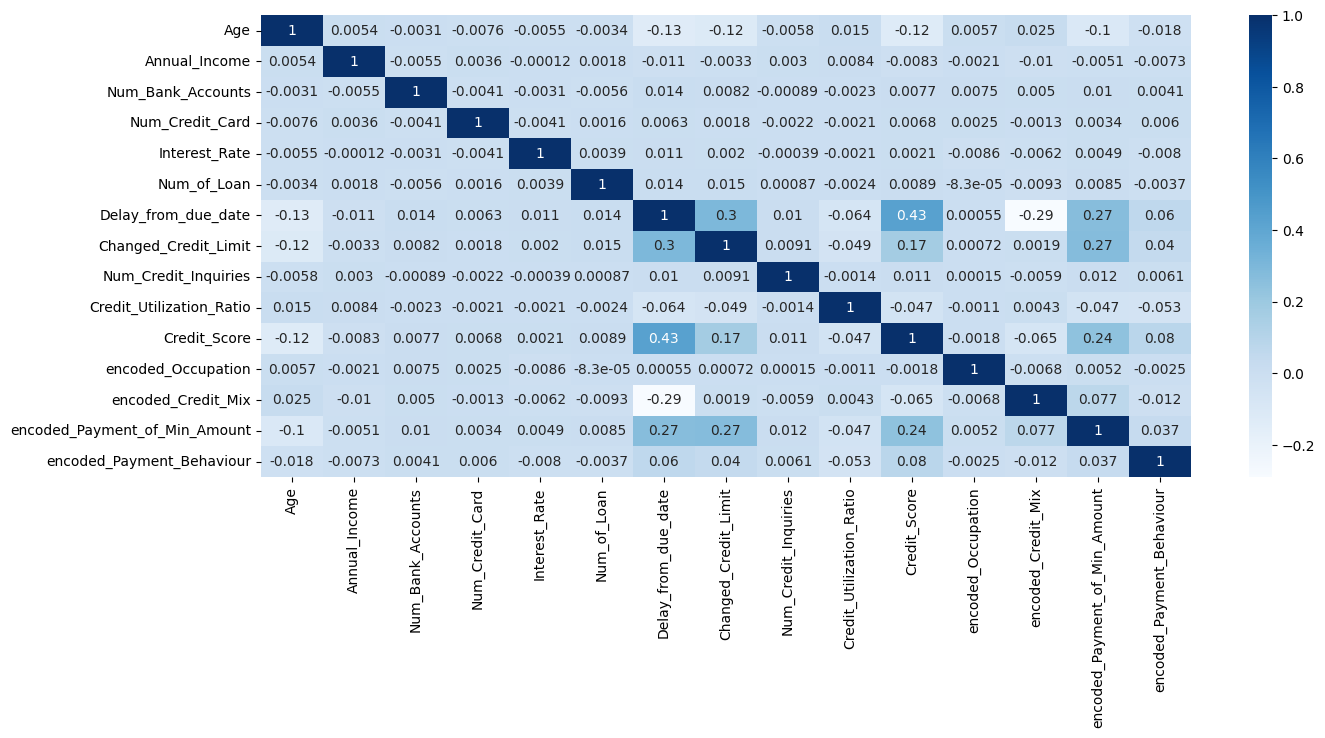

In [60]:
# plot correlation Matrix
num_attributes = df.select_dtypes(exclude=['object'])
correlation = num_attributes.corr(method = 'pearson')

plt.figure(figsize=(15, 6))
sns.heatmap(correlation, annot = True, cmap="Blues");

In [24]:
#drop high corr column
df = df.drop('Outstanding_Debt', axis = 1)

**📝 Feature Selection - Outros Métodos**

1. Métodos de Filtro: Avaliam características com base em propriedades estatísticas como correlação ou variância.

2. Análise de Componentes Principais (PCA): Reduz a dimensionalidade transformando características em um espaço dimensional menor.

3. Importância de Características de Árvores: Modelos como Árvores de Decisão fornecem pontuações de importância de características.

4. Seleção de Características Univariadas: Seleciona características com base em testes estatísticos univariados.

## Data Preparation

Normalização é o processo de ajustar os valores das características para uma escala comum.

Encoding é a conversão de variáveis categóricas em uma forma numérica para que possam ser usadas em algoritmos de machine learning.

### Normalization

In [25]:
len(num_attributes.columns)

11

In [26]:
num_attributes.describe().loc['mean']


Age                             34.389338
Annual_Income               177591.670549
Num_Bank_Accounts               16.941026
Num_Credit_Card                 22.389490
Interest_Rate                   73.821908
Num_of_Loan                      7.011034
Delay_from_due_date             21.214641
Changed_Credit_Limit            10.611477
Num_Credit_Inquiries            27.595233
Outstanding_Debt              1429.778891
Credit_Utilization_Ratio        32.282920
Name: mean, dtype: float64

In [27]:
rs = RobustScaler()
df['Annual_Income'] = rs.fit_transform(df[['Annual_Income']].values)

In [28]:
print(df['Annual_Income'].min())
print(df['Annual_Income'].max())
print(df['Annual_Income'].mean())

-0.5762270018265674
452.7590915624281
2.620514008997784



**📝 Normalização - Outros Métodos**


1. MinMaxScaler: Redimensiona os valores para um intervalo específico, geralmente entre 0 e 1.

2. StandardScaler: Padroniza os valores para que tenham uma média de 0 e um desvio padrão de 1.

3. Escalonamento personalizado: adapta a transformação dos dados para atender às necessidades específicas do conjunto de dados ou do problema em questão.


### Encoding

In [29]:
df[categorical_columns].head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Good,No,Low_spent_Large_value_payments,Good
1,Scientist,Good,No,Low_spent_Small_value_payments,Good
2,Scientist,Good,No,High_spent_Medium_value_payments,Good
3,Scientist,Good,No,!@9#%8,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Standard


### Credit Score - Target Variable

In [30]:
# #credit score - target variable
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [31]:
credit_score_dict = {'Good':      0,
                     'Standard' : 1,
                     'Poor' :     2}

df['Credit_Score'] = df['Credit_Score'].map(credit_score_dict)

print(df['Credit_Score'].value_counts())

1    38455
2    20942
0    12841
Name: Credit_Score, dtype: int64


### Other Variables

In [32]:
df['Occupation'].value_counts()

Unknown          5121
Lawyer           4730
Architect        4625
Engineer         4607
Scientist        4563
Accountant       4551
Mechanic         4546
Media_Manager    4505
Developer        4496
Teacher          4467
Journalist       4427
Entrepreneur     4424
Doctor           4383
Musician         4281
Manager          4279
Writer           4233
Name: Occupation, dtype: int64

In [33]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in df[categorical_columns].columns:
  count_encoding = df[column].value_counts()

  df[f'encoded_{column}'] = df[column].map(count_encoding)
  df.drop(columns=column,axis=1,inplace=True)

In [34]:
#only columns that contains 'enconded'
df.filter(regex='encoded').head()

,encoded_Occupation,encoded_Credit_Mix,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour
0,4563,22006,25781,7560
1,4563,22006,25781,18318
2,4563,22006,25781,12725
3,4563,22006,25781,5527
4,4563,22006,25781,12725


In [35]:
df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_Score,encoded_Occupation,encoded_Credit_Mix,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour
0,23,-0.349322,3.0,4,3,4.0,21.073355,11.27,4.0,31.944960,0,4563,22006,25781,7560
1,23,-0.349322,3.0,4,3,4.0,5.000000,6.27,4.0,31.377862,0,4563,22006,25781,18318
2,23,-0.349322,3.0,4,3,4.0,6.000000,11.27,4.0,24.797347,0,4563,22006,25781,12725
3,23,-0.349322,3.0,4,3,4.0,8.000000,9.27,4.0,27.262259,0,4563,22006,25781,5527
4,23,-0.349322,3.0,4,3,4.0,3.000000,11.27,4.0,23.933795,1,4563,22006,25781,12725


# Machine Learning Models

## Train Test Split

In [36]:
#dependent and independent variables
X = df.drop(columns='Credit_Score',axis=1)
y = df['Credit_Score']


In [37]:
X.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,encoded_Occupation,encoded_Credit_Mix,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour
0,23,-0.349322,3.0,4,3,4.0,21.073355,11.27,4.0,31.944960,4563,22006,25781,7560
1,23,-0.349322,3.0,4,3,4.0,5.000000,6.27,4.0,31.377862,4563,22006,25781,18318
2,23,-0.349322,3.0,4,3,4.0,6.000000,11.27,4.0,24.797347,4563,22006,25781,12725
3,23,-0.349322,3.0,4,3,4.0,8.000000,9.27,4.0,27.262259,4563,22006,25781,5527
4,23,-0.349322,3.0,4,3,4.0,3.000000,11.27,4.0,23.933795,4563,22006,25781,12725


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Credit_Score, dtype: int64

In [39]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

Random Forest Classifier é um algoritmo de aprendizado de máquina que cria múltiplas árvores de decisão durante o treinamento e combina suas previsões para obter uma classificação dos dados.

Referência: [Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook)

In [40]:
RNF = RandomForestClassifier()

RNF.fit(X_train,y_train)

#predict
y_hat = RNF.predict(X_test)

In [41]:
y_hat

array([1, 2, 1, ..., 2, 1, 1])

### Model Evaluation

In [ ]:
reverse_credit_score_dict = {v: k for k, v in credit_score_dict.items()}


In [52]:
accuracy_rf = accuracy_score(y_test, y_hat)

# Precision, Recall, F1 Score
report_rf = classification_report(y_test, y_hat, output_dict=True, target_names=reverse_credit_score_dict)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_rf = report_rf['weighted avg']['f1-score']

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_hat)

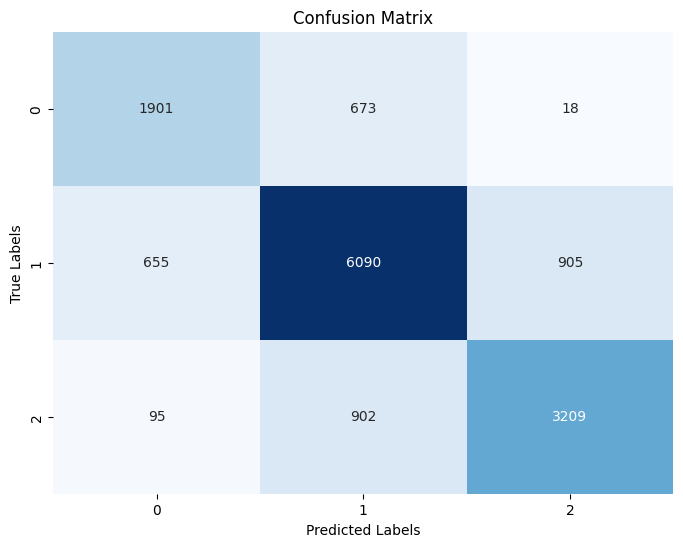

In [59]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Decision Tree Classifier

Decision Tree é um algoritmo de aprendizado de máquina que divide o conjunto de dados em subconjuntos menores com base em características específicas, seguindo um processo de decisão hierárquico para fazer previsões de classe

Referência: [Decision-Tree Classifier Tutorial](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial)

In [63]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

#predict
y_dt = DT.predict(X_test)

In [64]:
y_dt

array([1, 2, 1, ..., 1, 2, 1])

### Model Evaluation

In [68]:
accuracy_dt = accuracy_score(y_test, y_dt)

# Precision, Recall, F1 Score
report_dt = classification_report(y_test, y_dt, output_dict=True, target_names=reverse_credit_score_dict)
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']
f1_dt = report_dt['weighted avg']['f1-score']

# Confusion Matrix


conf_matrix_dt = confusion_matrix(y_test, y_dt)

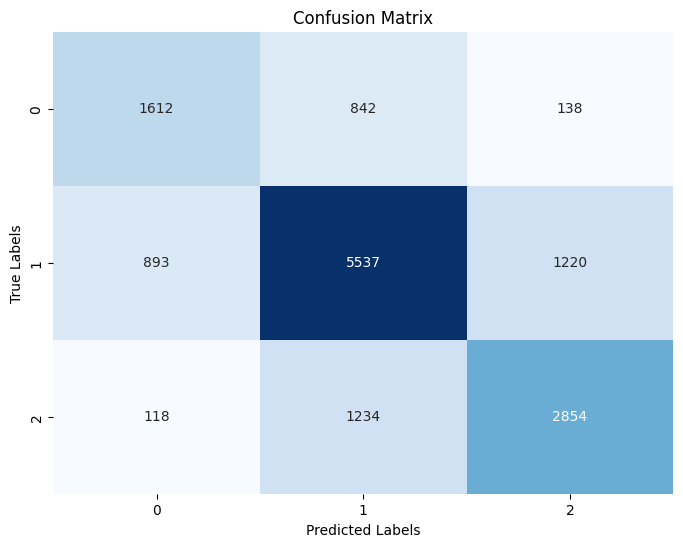

In [67]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

📝 Acurácia

1. Redes Neurais Artificiais (ANN)
2. Máquinas de Vetores de Suporte (SVM)
3. K-Nearest Neighbors (KNN)
4. Gradient Boosting Machines (GBM)

## Cross-Validation

In [75]:
# Initialize k-fold cross-validation
k_fold = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(RNF, X, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Cross-Validation Scores: [0.764701   0.76776444 0.76755679]
Mean Accuracy: 0.7666740769827557
Standard Deviation of Accuracy: 0.0013977515347625559



**📝 Acurácia**

1. Feature Engineering: Criação e seleção de novas features, outros métodos de normalização, etc.

2. Hyperparameter Tuning: Configurações do modelo, como parâmetros de regularização ou taxas de aprendizado

3. Ensemble Methods: Utilize ensemble methods such as bagging, boosting, or stacking. Ensemble methods combine multiple models to improve performance, often by reducing variance or bias in predictions.

4. Algorithm Selection: Teste de outros modelos de Machine Learning ou Deep learning.

5. Imbalanced Data Handling: Técnicas como oversampling, undersampling ou algoritmos específicos para lidar com esse desbalanceamento

6. Análise de Erros: Realize uma análise detalhada dos erros do modelo para identificar áreas de melhoria e entender os tipos de erros cometidos.

7. Conhecimento de negócio: Incorpore conhecimento específico do domínio no processo de modelagem.